**Лабараторная работа 1** \
Суть - векторизовать контент статьи и кластеризовать данные

In [24]:
import re
import nltk
from natasha import Segmenter, MorphVocab, NewsEmbedding, NewsMorphTagger, Doc
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

**Этап 1 - нормализация** \
С помощью библиотеки natasha или pymorphy 2 - преобразовать текст в нормальную форму, выбросить стоп-слова

In [25]:
# Загружаем стоп-слова
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))
stop_symb = set(['.', ' '])

# Инициализация инструментов для нормализации текста
segmenter = Segmenter()
morph_vocab = MorphVocab()
morph_analyzer = MorphAnalyzer()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

def normalize_text(text):
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    
    normalized_tokens = []
    for token in doc.tokens:
        token.lemmatize(morph_vocab)
        if token.lemma not in stop_words and token.lemma not in stop_symb:
            normalized_tokens.append(token.lemma)
    return ' '.join(normalized_tokens)


with open('articles.json', encoding='utf-8') as file:
    file_content = file.read()
    data = json.loads(file_content)


# В список titles запишем заголовки статей
texts = []
for article in data:
    texts.append(article['title'])

print(texts)
print(f'Количество заголовков: {len(texts)}')


normalized_texts = [normalize_text(text) for text in texts]
print(normalized_texts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Биологи выяснили причину массовой гибели морских ежей в Красном море', 'Астрономы впервые разглядели рождение древнейших галактик Вселенной', 'Ворон научили «считать» вслух', 'Ученые предсказали невиданную молекулу в недрах Урана и Нептуна, которая влияет на магнитное поле планет', 'Разный уход за детьми мог способствовать успеху современных людей на фоне неандертальцев', 'В ПНИПУ улучшили технологию производства лопаток двигателя', 'Кофеин повысил обучаемость муравьев', 'В КБГУ разработали инновационный метод получения аминотриметиленфосфоновой кислоты', 'Недалеко от Земли нашли потенциально пригодную для жизни экзопланету. Там тепло и, вероятно, есть вода', 'Просмотр блогерского контента удовлетворил эмоциональные потребности лучше, чем общение с друзьями', 'В ПНИПУ разработали микрогели, полезные для нефтедобычи и доставки лекарственных веществ в организм', 'Психологи выяснили, почему люди смотрят порнографию чаще обычного', 'Создан прототип дешевого МРТ-сканера с питанием от розе

**Этап 2 - веткоризация** \
Используйте 1 из представленных способов \
CountVectorizer (sklearn) \
TFIDFVectrorizer (sklearn) \
Word2Vec (gensim)

In [26]:
# Векторизация текста
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(normalized_texts)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

**Этап 3 - Сжатие векторов** \
С помощью PCA - сжать векторы до 2-точек, для построения кластеров

In [27]:
# Сжатие векторов до 2 компонентов
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

**Этап 4 - клатеризация** \
использовать KMeans
Использовать DBSSCAN

In [28]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

In [29]:
# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
clusters = dbscan.fit_predict(X_pca)

**Этап 5 - результаты анализа** \
Выделить темы, по которым были построены кластеры

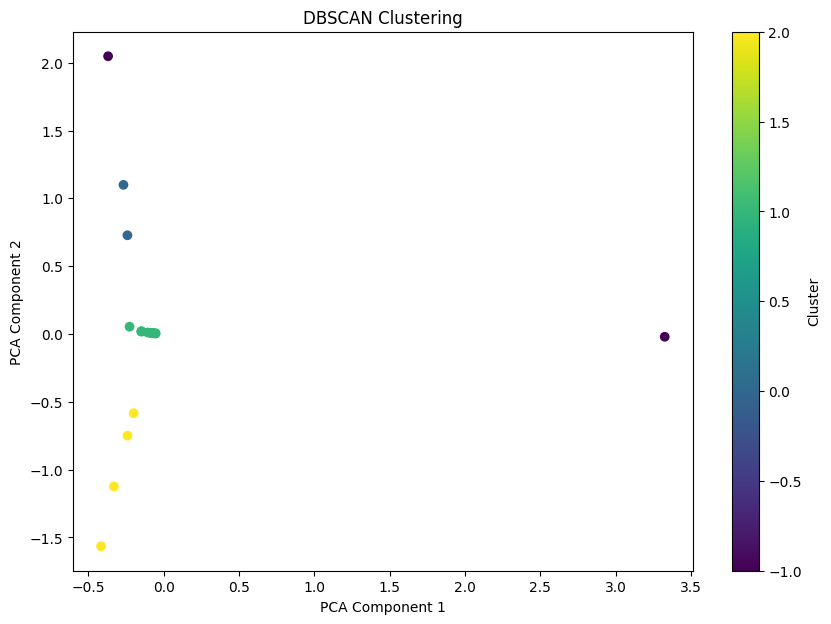

Cluster 0:
['Биологи выяснили причину массовой гибели морских ежей в Красном море', 'Психологи выяснили, почему люди смотрят порнографию чаще обычного']
Cluster 1:
['Астрономы впервые разглядели рождение древнейших галактик Вселенной', 'Ворон научили «считать» вслух', 'Кофеин повысил обучаемость муравьев', 'Недалеко от Земли нашли потенциально пригодную для жизни экзопланету. Там тепло и, вероятно, есть вода', 'Просмотр блогерского контента удовлетворил эмоциональные потребности лучше, чем общение с друзьями', 'Создан прототип дешевого МРТ-сканера с питанием от розетки', 'Обнаружены связанные с психическими заболеваниями варианты генов развития нервной ткани', 'Пословицу «Повторение — мать учения» научно обосновали', 'Сторонники теорий заговоров оказались любителями пофилософствовать', 'Астрономы предложили отслеживать инопланетян по отражению их энергосистемы', 'Военврачи лечат превосходящих по званию пациентов лучше', 'В ИФХЭ РАН изучили структурообразование в неотвержденной смеси из

In [30]:
# Визуализация результатов
df = pd.DataFrame({'x': X_pca[:, 0], 'y': X_pca[:, 1], 'cluster': clusters})

plt.figure(figsize=(10, 7))
plt.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Выделение тем по кластерам
for cluster in set(clusters):
    print(f"Cluster {cluster}:")
    cluster_texts = [texts[i] for i in range(len(clusters)) if clusters[i] == cluster]
    print(cluster_texts)